# Our Measures vs Plate Reader AIGUA PESC 3.12d3
* This exercise should help us decide which 'pocillos' to consider, and which to discard.
* We use data from *Aigua Pesc* and *Exp Gal*

In [1]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

## Absorbancia

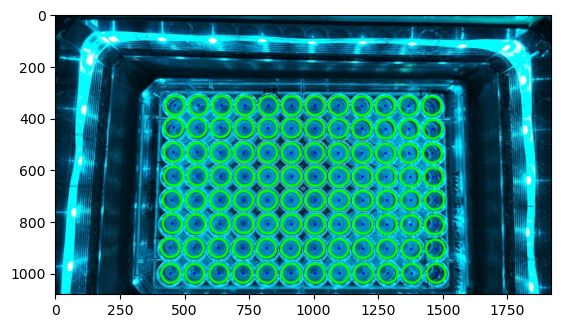

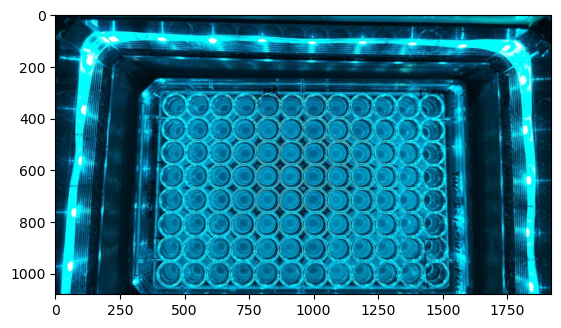

In [2]:
img_path = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:34:36 AIGUA PESC 3.12d3/PLATE1/Picture_Aigua_10M5_#1_2023-05-12_10:37:22_P1_Cam2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

plt.imshow(img)

### Our measure

In [3]:
grid_positions = new_circles[:,3:5]
mean_output_array = np.zeros((8,12))
for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        cropped_pocillo_blue = cropped_pocillo[:,:,2]
        mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo_blue[cropped_pocillo_blue != 0])

### Plate reader

In [4]:
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:34:36 AIGUA PESC 3.12d3/Copy of 3.xlsx').iloc[3:11,2:14].values.astype(float)
pd.DataFrame(readings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.8156,0.4249,0.4126,0.5408,0.7800,0.9071,0.5466,0.8665,0.5216,0.5880,0.5575,0.1861
1,0.7660,0.5792,0.4338,0.4641,0.8770,0.8899,0.4992,0.9298,0.4140,0.5197,0.5250,0.1219
2,0.8901,0.5769,0.5039,0.4685,0.8459,0.8853,0.5026,0.9672,0.5246,0.5758,0.4715,0.1038
3,0.8612,0.5380,0.4006,0.4755,0.9088,0.9100,0.5422,0.9415,0.5880,0.5701,0.5688,0.1443
4,0.8614,0.5590,0.4738,0.4806,0.8486,0.9125,0.5503,1.0713,0.5712,0.5630,0.4448,0.1264
5,0.8977,0.5548,0.5023,0.5718,0.9352,0.9849,0.5850,0.9973,0.5893,0.5637,0.5309,0.1254
6,0.8826,0.5503,0.4737,0.5601,0.9324,0.9269,0.5616,0.9212,0.5505,0.5698,0.4989,0.1048
7,0.7751,0.5304,0.5172,0.5827,0.8526,0.8530,0.5748,0.8958,0.5541,0.5808,0.5737,0.0741


### Comparing
* Orange = our measure
* Blue = reading

Row  1


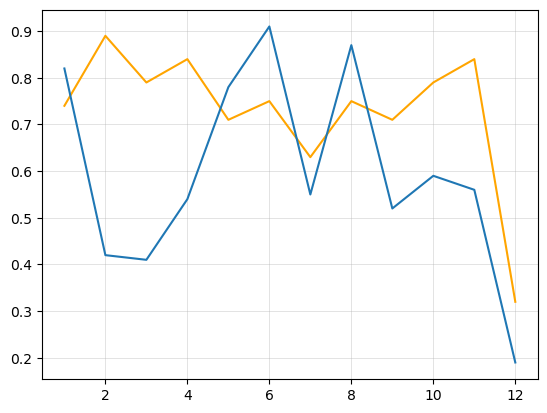

Row  2


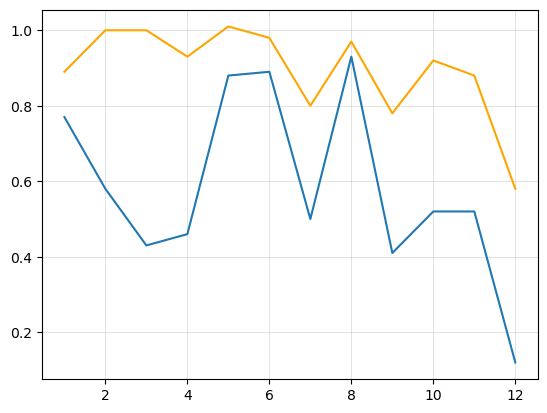

Row  3


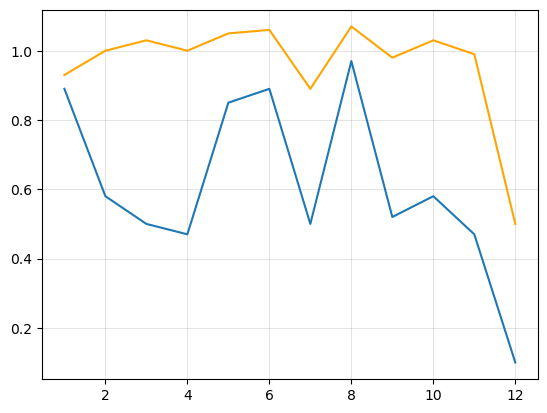

Row  4


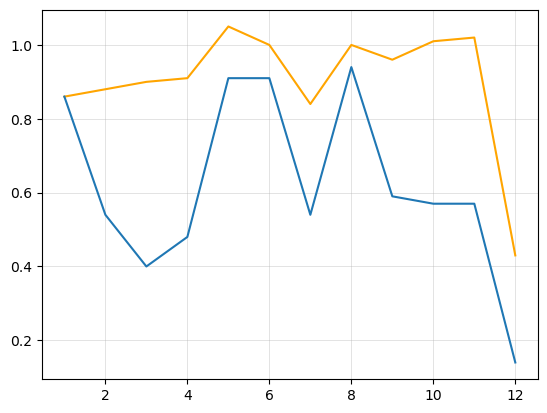

Row  5


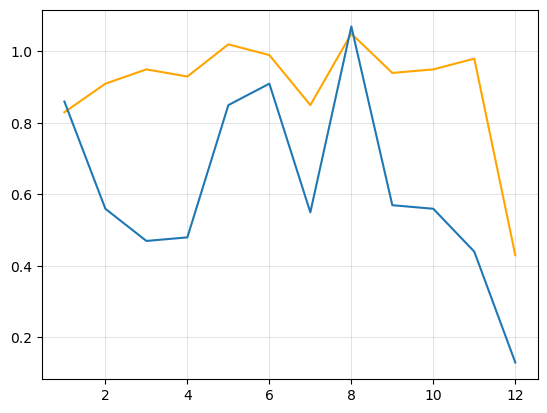

Row  6


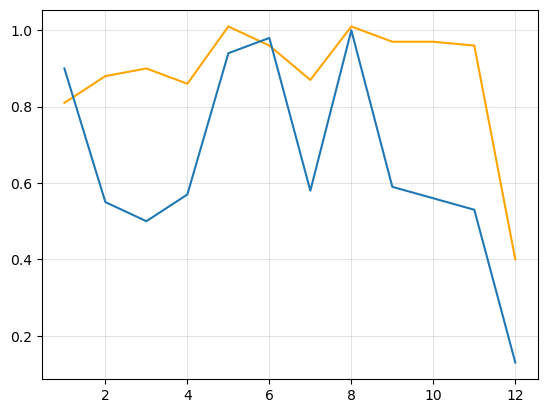

Row  7


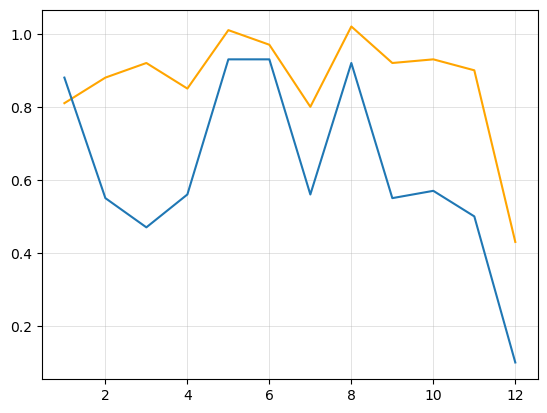

Row  8


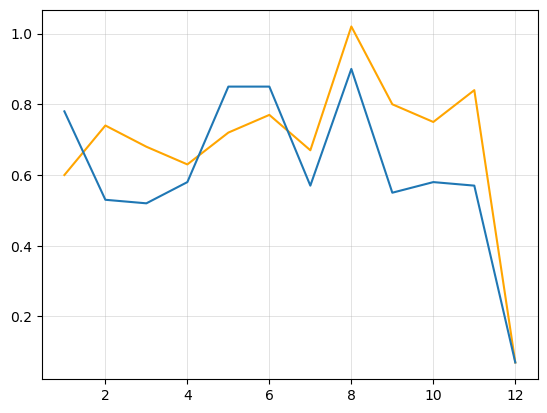

In [5]:
# Linear scaling to fit max/min range of the readings
x = mean_output_array
a, b = readings.min(), readings.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)
readings = np.round(readings,2)

# Plot results row by row
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,13), x_norm[i,:], "orange")
    plt.plot(np.arange(1,13), readings[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [6]:
np.mean(readings-x_norm)

-0.23916666666666667

#### Little experiment 1: Remove first and last columns

In [7]:
readings1 = np.round(readings,2)[:, 1:11]

In [8]:
# Linear scaling to fit max/min range of the readings
x = mean_output_array[:, 1:-1]
a, b = readings1.min(), readings1.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)

Row  1


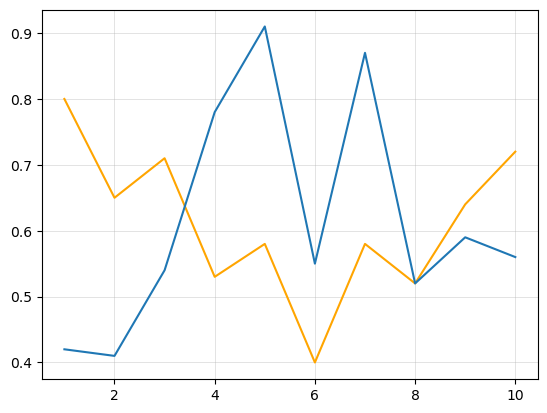

Row  2


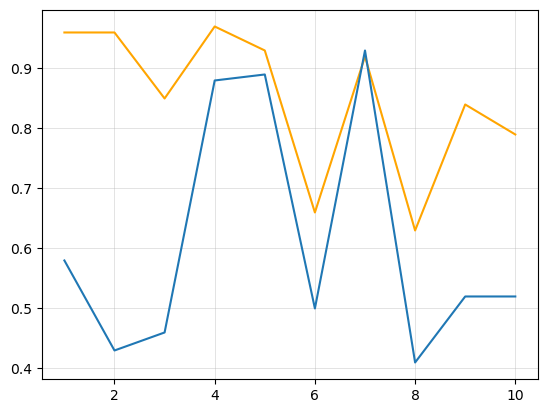

Row  3


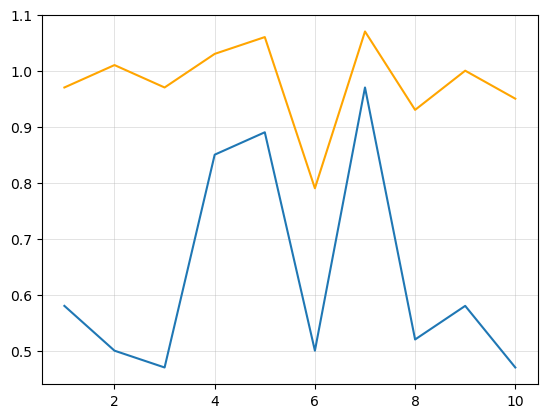

Row  4


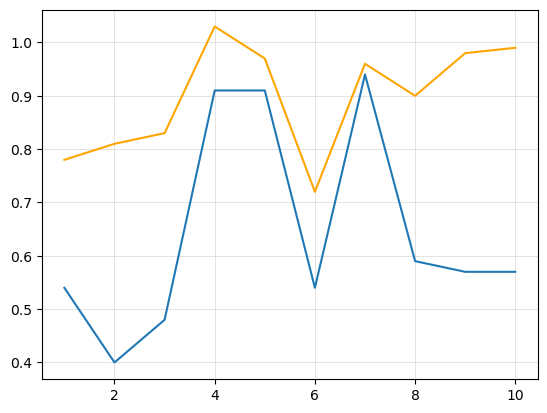

Row  5


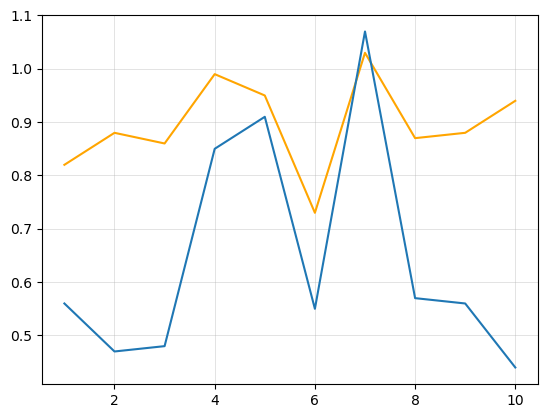

Row  6


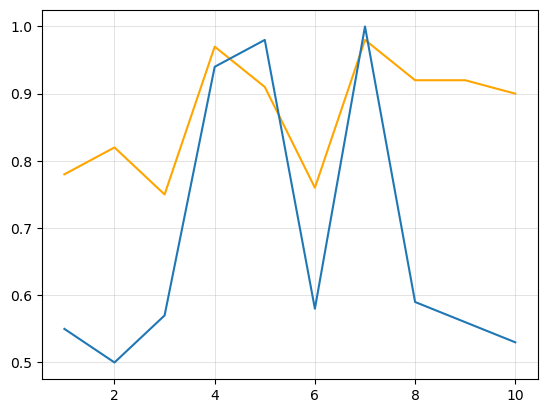

Row  7


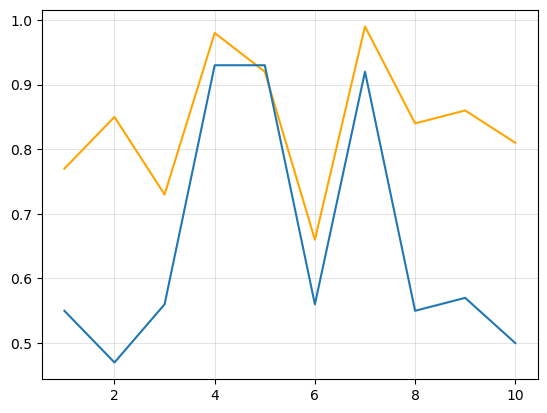

Row  8


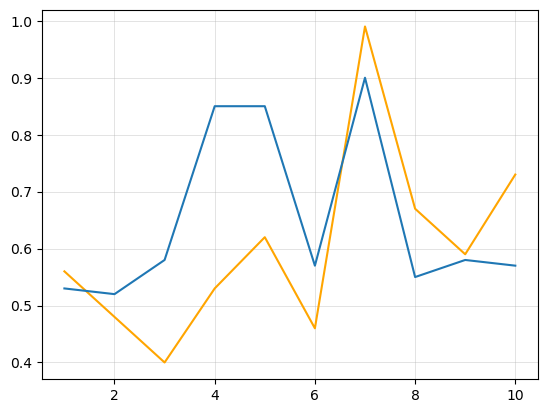

In [9]:
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,11), x_norm[i,:], "orange")
    plt.plot(np.arange(1,11), readings1[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [10]:
np.mean(readings1-x_norm)

-0.17675000000000002

#### Little experiment 2: Remove first and last columns & rows

In [11]:
readings2 = np.round(readings,2)[1:7, 1:11]
x = mean_output_array[1:7, 1:-1]
a, b = readings2.min(), readings2.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)

Row  2


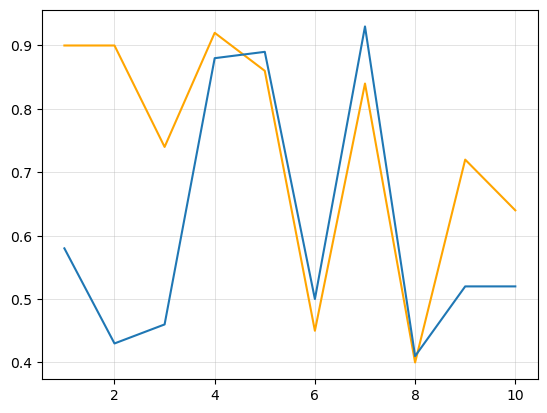

Row  3


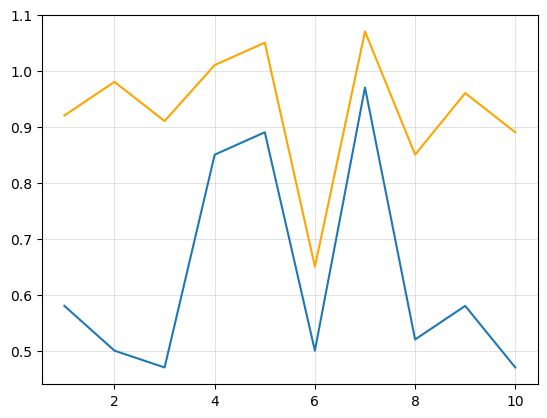

Row  4


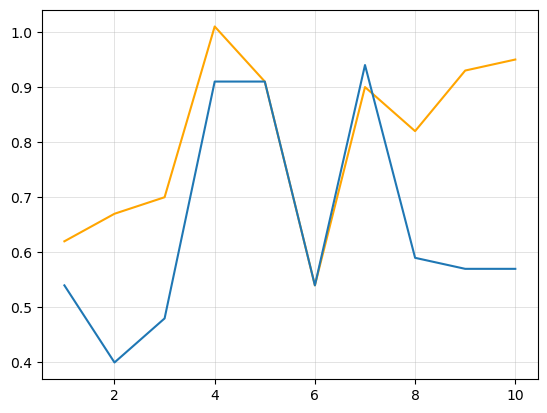

Row  5


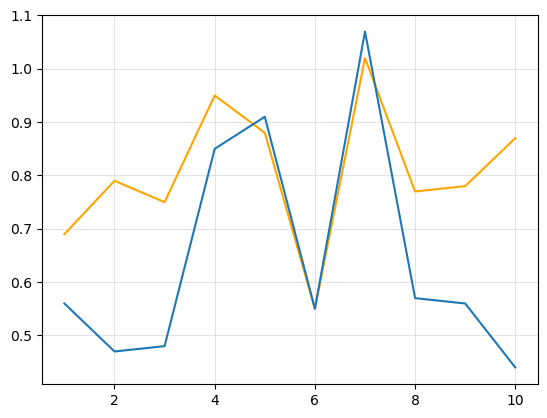

Row  6


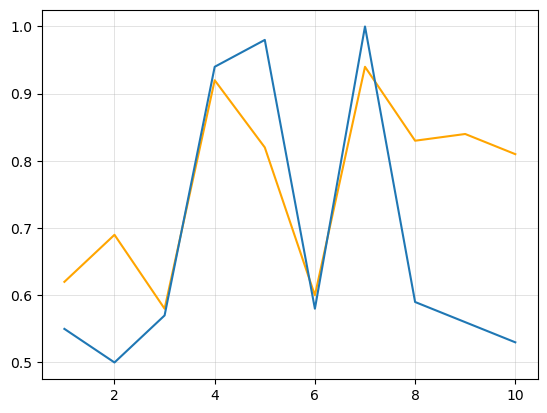

Row  7


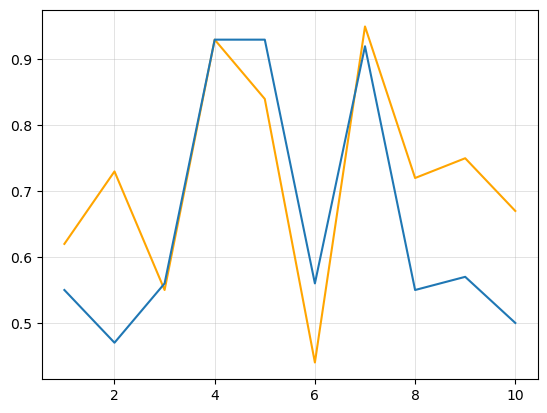

In [12]:
for i in range(6):   
    print("Row ", i+2)
    plt.plot(np.arange(1,11), x_norm[i,:], "orange")
    plt.plot(np.arange(1,11), readings2[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [13]:
np.mean(readings2-x_norm), np.mean(readings2-x_norm)/np.mean(readings2)

(-0.14849999999999997, -0.23023255813953486)

## Fluorescència

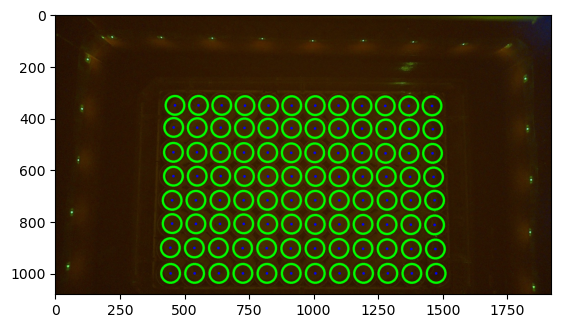

In [14]:
img_path = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:34:36 AIGUA PESC 3.12d3/PLATE1/Picture_Aigua_10M5_#1_2023-05-12_10:37:21_P1_Cam1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
draw_circles(img, new_circles)

In [15]:
grid_positions = new_circles[:,3:5]
q9_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        cropped_pocillo_green = cropped_pocillo[:,:,1]
        q9_output_array[position[0], position[1]] = np.percentile(cropped_pocillo_green[cropped_pocillo_green != 0], 90).astype(int)        
        
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:34:36 AIGUA PESC 3.12d3/Copy of 3.xlsx').iloc[24:32,2:14].values.astype(int)
pd.DataFrame(readings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,6139560,8423434,5480570,17068082,10458214,8633569,8535757,7432949,7094580,9338265,8322416,6783915
1,6874154,18614032,11074052,16744252,19227120,12744673,12490998,13083957,4903748,13110819,12471035,7665862
2,10971476,18338700,16504827,18166376,17782154,10574148,13666322,13490633,13001588,13437447,13205112,7989246
3,11149302,12033030,8241564,18935286,18741566,13448452,12718532,12857428,13470577,13591291,12789344,7700788
4,9868624,18547680,14285483,18327992,17850736,12558271,14169652,13220341,13077664,13837769,13933034,8469957
5,13113088,19235988,5934972,18822976,19740494,13201838,13247148,15224572,15225836,14689947,13551897,7309518
6,11335638,17370252,13907486,15939297,20404524,14005889,12284911,12664613,11991302,13336967,11963474,6609692
7,7674407,11486554,11783899,13797389,14811433,9317807,10671315,8910647,9397916,9251617,8488141,156158


Row  1


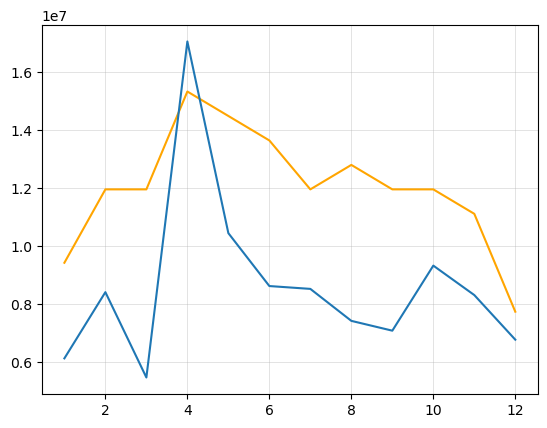

Row  2


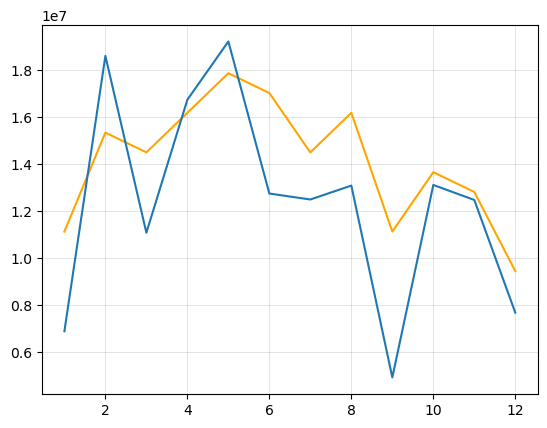

Row  3


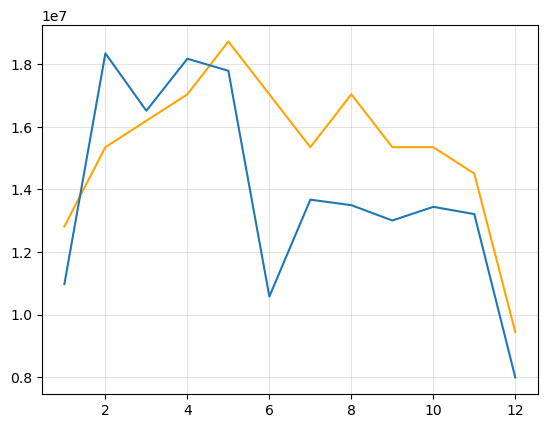

Row  4


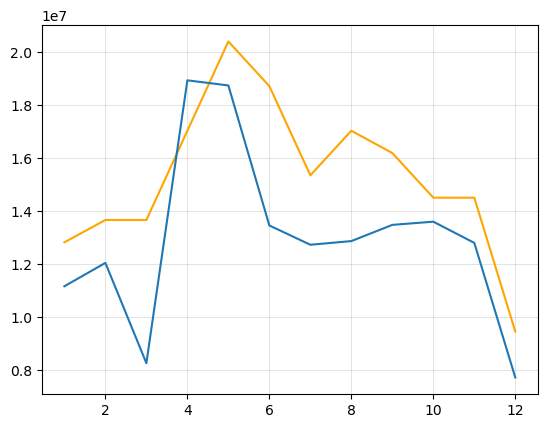

Row  5


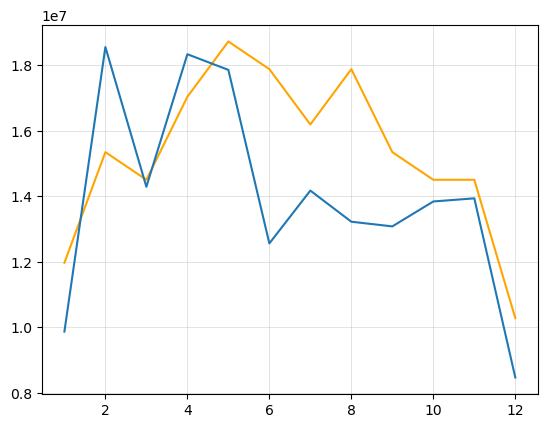

Row  6


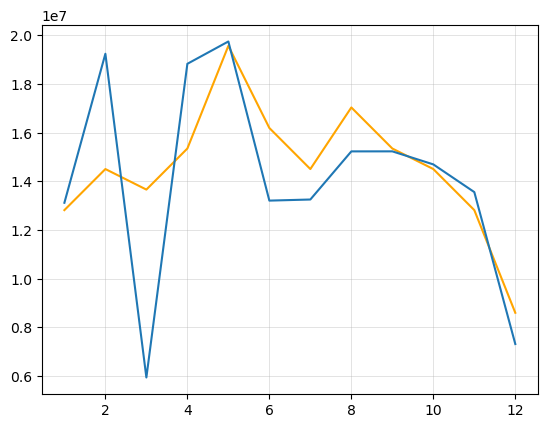

Row  7


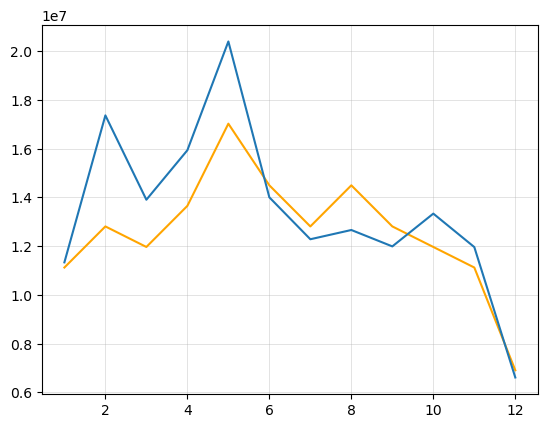

Row  8


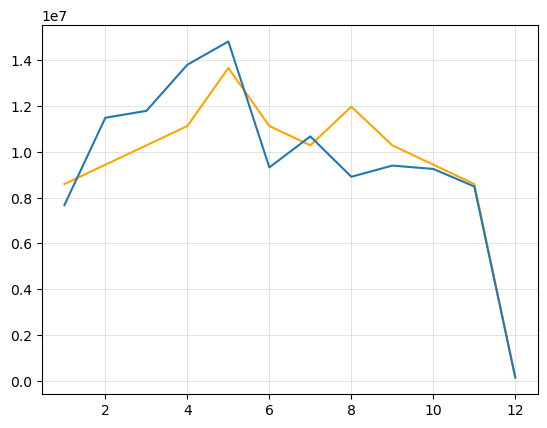

In [16]:
# Linear scaling to fit max/min range of the readings
x = q9_output_array
a, b = readings.min(), readings.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)
readings = np.round(readings,2)

# Plot results row by row
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,13), x_norm[i,:], "orange")
    plt.plot(np.arange(1,13), readings[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [17]:
np.mean(readings-x_norm)/np.mean(readings)

-0.0975535012088128